In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv("../../../Bigdata Files/polynomial.csv")
df

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [8]:
df.drop("sno",inplace=True,axis=1)
df

,Temperature,Pressure
0,0,0.0002
1,20,0.0012
2,40,0.0060
3,60,0.0300
4,80,0.0900
5,100,0.2700


In [9]:
df.describe()

,Temperature,Pressure
count,6.000000,6.000000
mean,50.000000,0.066233
std,37.416574,0.105467
min,0.000000,0.000200
25%,25.000000,0.002400
50%,50.000000,0.018000
75%,75.000000,0.075000
max,100.000000,0.270000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  6 non-null      int64  
 1   Pressure     6 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 224.0 bytes


In [13]:
X=df.drop("Pressure",axis=1).values

In [14]:
X

array([[  0],
       [ 20],
       [ 40],
       [ 60],
       [ 80],
       [100]])

In [15]:
y=df["Pressure"].values

In [16]:
y

array([2.0e-04, 1.2e-03, 6.0e-03, 3.0e-02, 9.0e-02, 2.7e-01])

In [19]:
from sklearn.linear_model import LinearRegression

In [22]:
model=LinearRegression()
model.fit(X,y)
y_pred=model.predict(X)
y_pred

array([-0.05086667, -0.00402667,  0.04281333,  0.08965333,  0.13649333,
        0.18333333])

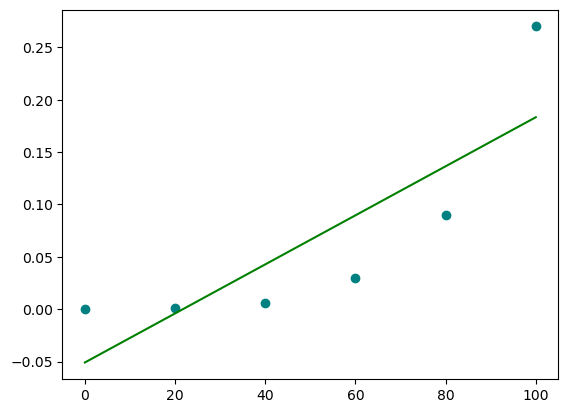

In [24]:
plt.scatter(X,y,c="teal")
plt.plot(X,y_pred,c="g")

In [25]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score

In [28]:
print("MAPE",mean_absolute_percentage_error(y,y_pred))

MAPE 44.775078189300416


In [29]:
print("R2 Score",r2_score(y,y_pred))

R2 Score 0.690349972603981


In [31]:
# we need to apply polynomial regression on this model

In [32]:
from sklearn.preprocessing import PolynomialFeatures

In [33]:
poly=PolynomialFeatures(degree=3)
# degree 3 means x has 4 features
x_poly=poly.fit_transform(X)
x_poly

array([[1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00],
       [1.00e+00, 2.00e+01, 4.00e+02, 8.00e+03],
       [1.00e+00, 4.00e+01, 1.60e+03, 6.40e+04],
       [1.00e+00, 6.00e+01, 3.60e+03, 2.16e+05],
       [1.00e+00, 8.00e+01, 6.40e+03, 5.12e+05],
       [1.00e+00, 1.00e+02, 1.00e+04, 1.00e+06]])

In [34]:
x_poly.shape

(6, 4)

In [35]:
# now x has 4 columns

In [36]:
poly.fit(x_poly,y) # To correct diamension
model1=LinearRegression()
model1.fit(x_poly,y)
y_poly=model1.predict(x_poly)
y_poly

array([-0.00198889,  0.00724444,  0.00371111,  0.02248889,  0.09865556,
        0.26728889])

In [37]:
# actual valu ,slr,pr

In [39]:
df_error=pd.DataFrame({"Actual_val":y,"Simple_Predicted":y_pred,"Polynomial_Predicted":y_poly})
df_error

,Actual_val,Simple_Predicted,Polynomial_Predicted
0,0.0002,-0.050867,-0.001989
1,0.0012,-0.004027,0.007244
2,0.0060,0.042813,0.003711
3,0.0300,0.089653,0.022489
4,0.0900,0.136493,0.098656
5,0.2700,0.183333,0.267289


In [40]:
# evaluate performan of polynomial regression

In [41]:
print("Error of Polynomial regression is",mean_absolute_percentage_error(y,y_poly))

Error of Polynomial regression is 2.7865912208767987


In [42]:
# 2 % error 98 % accuracy

In [43]:
print("R2 Score of Polynomial Regression",r2_score(y,y_poly))

R2 Score of Polynomial Regression 0.9966691251761722


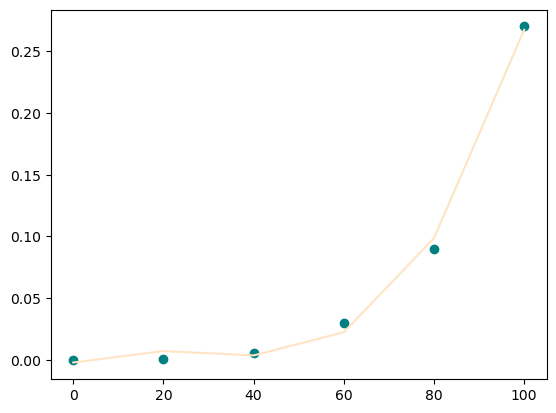

In [49]:
plt.scatter(X,y,c="teal")
plt.plot(X,y_poly,c="bisque")